In [1]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a = 5
b = 7
c = a + b

In [2]:
fruit = c("a",'b','c')

In [3]:
print(fruit)

[1] "a" "b" "c"


In [4]:
print(c)

[1] 12


**Exercise 1: Random data**

In [5]:
x <- floor(runif(100, min=1, max=101))
y <- floor(runif(100, min=1, max=101))
print(x[1:10])
print(y[1:10])

 [1] 99 84 10 91 62 25 71  3 73 41
 [1] 58 94 85 81  9  9 91 13  7 67


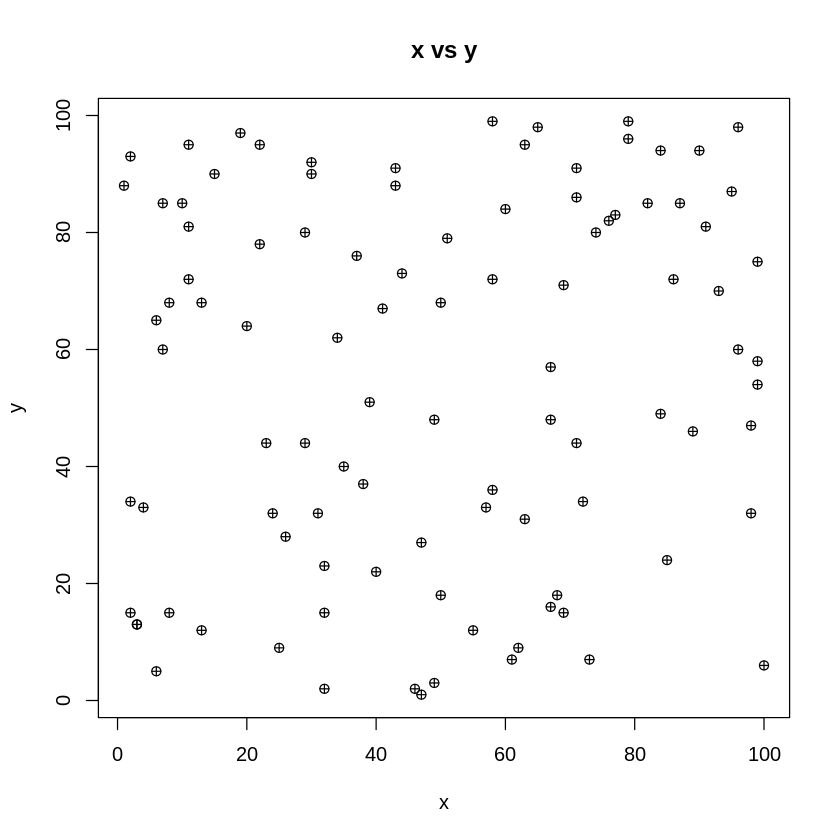

In [6]:
plot(x = x,y = y,
xlab = "x",
ylab = "y",
main = "x vs y",
pch = 10
)

In [7]:
mydata<-data.frame(x = x, y = y)
print(head(mydata))
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 1:10) wss[i] <- sum(kmeans(mydata,
centers=i)$withinss)

   x  y
1 99 58
2 84 94
3 10 85
4 91 81
5 62  9
6 25  9


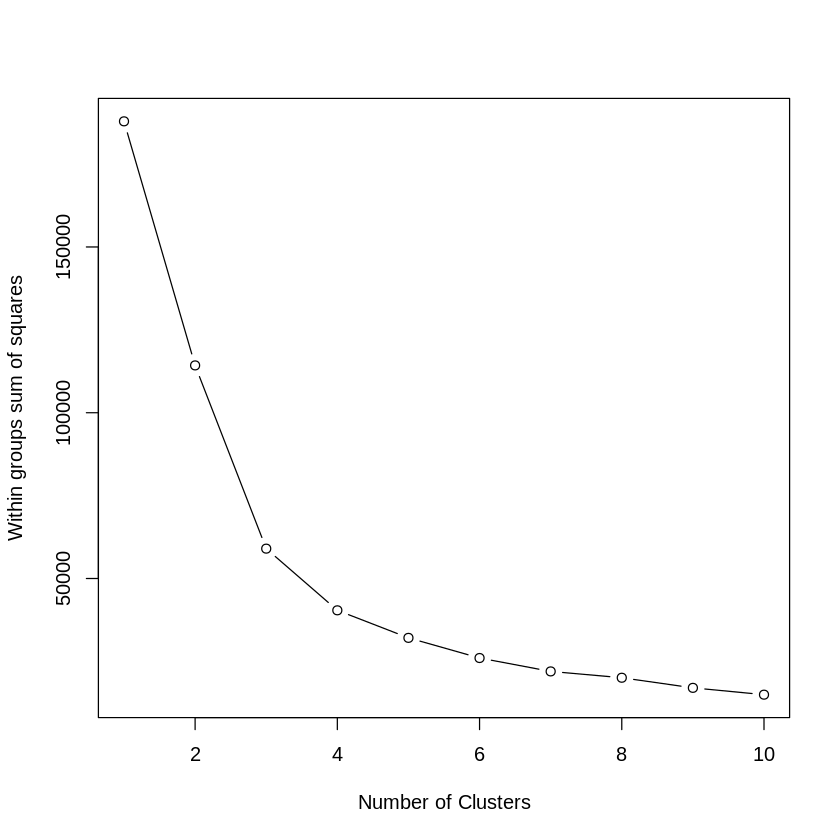

In [8]:
plot(1:10, wss, type="b", xlab="Number of Clusters",
ylab="Within groups sum of squares")

In [9]:
set.seed(20)
dataCluster <- kmeans(mydata, centers = 4, nstart = 20)
print(dataCluster)

K-means clustering with 4 clusters of sizes 22, 30, 20, 28

Cluster means:
         x        y
1 64.27273 21.40909
2 81.16667 78.26667
3 20.40000 23.40000
4 23.42857 78.60714

Clustering vector:
  [1] 2 2 4 2 1 3 2 3 1 4 2 4 4 3 2 3 2 4 3 2 2 2 3 4 2 1 3 2 2 2 1 2 1 3 1 1 3
 [38] 4 4 2 2 4 4 4 4 1 4 2 2 2 1 2 3 4 1 3 1 1 4 1 2 2 4 4 4 3 4 4 2 4 2 3 1 2
 [75] 1 3 2 4 3 1 3 1 2 3 4 4 1 4 3 3 1 2 1 1 3 1 4 2 4 4

Within cluster sum of squares by cluster:
[1]  9665.682 13160.033  6783.600 10801.536
 (between_SS / total_SS =  78.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [10]:
print("Centroid points:")
print(dataCluster$centers)

[1] "Centroid points:"
         x        y
1 64.27273 21.40909
2 81.16667 78.26667
3 20.40000 23.40000
4 23.42857 78.60714


In [11]:
x <- c(80, 50, 70)
y <- c(30, 45, 75)
data_new <- data.frame(x = x, y = y)
clusters <- function(x, centers) {
# compute squared euclidean distance from each sample to each cluster center
tmp <- sapply(seq_len(nrow(x)),
function(i) apply(centers, 1,
function(v) sum((x[i, ]-v)^2)))
max.col(-t(tmp)) # find index of min distance
}
new <- clusters(data_new, dataCluster[["centers"]])
new

[1] 1 1 2

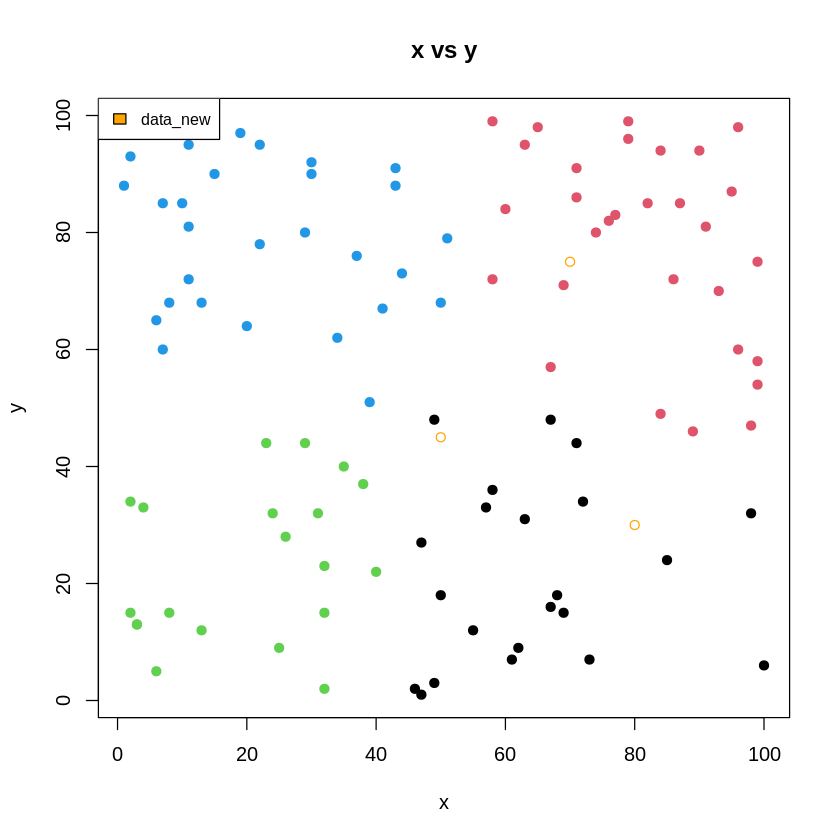

In [12]:
dataCluster$cluster <- as.factor(dataCluster$cluster)
plot(x = mydata$x, y = mydata$y,
xlab = "x",
ylab = "y",
main = "x vs y", col = dataCluster$cluster,
pch = 19
)
lines(x, y, col='orange', type='p')
legend("topleft", c("data_new"), cex=0.8, fill = c("orange"))

In [13]:
install.packages('factoextra')
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



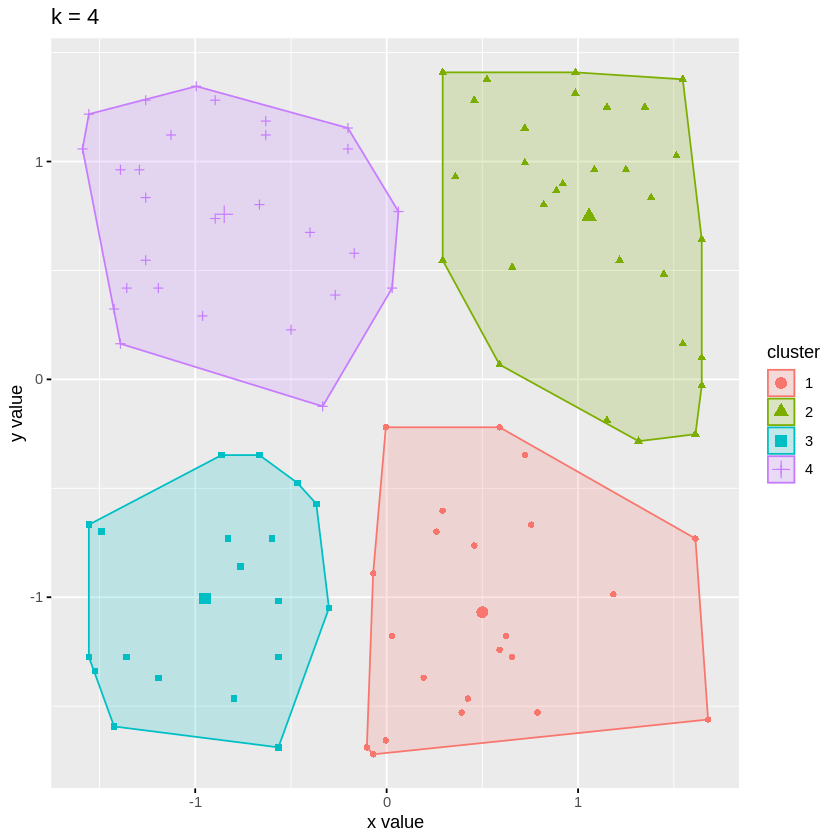

In [14]:
fviz_cluster(dataCluster, geom = "point", data = mydata) +
ggtitle("k = 4")